In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'AAPL', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,19.606428,19.714287,19.535713,19.714287,16.648226,407282400
2012-03-13,19.912144,20.292143,19.848213,20.289286,17.133806,690855200
2012-03-14,20.644644,21.240000,20.549999,21.056429,17.781645,1418844000
2012-03-15,21.414642,21.428928,20.662500,20.912857,17.660393,1159718000
2012-03-16,20.882856,21.042856,20.642857,20.913214,17.660692,825487600
2012-03-19,21.370358,21.491785,21.037500,21.467857,18.129072,901236000
2012-03-20,21.411072,21.674999,21.124287,21.641430,18.275650,816662000
2012-03-21,21.526428,21.773214,21.478930,21.517857,18.171307,644042000
2012-03-22,21.349285,21.589287,21.268929,21.405001,18.075996,623870800


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

C:\Users\pramo\AppData\Local\Temp\ipykernel_6604\2358861191.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,23.089287,23.114286,22.432142,19.024721,35.875684,23.552655,22.673908,21.845652,-3.410801,0,19.073484
1,22.484285,22.692142,22.332144,19.073484,36.765282,23.451416,22.670259,21.854182,-3.357473,0,19.226456
2,22.583929,22.683214,22.280357,19.226456,39.582099,23.376995,22.670254,21.864988,-3.010088,0,19.681698
3,22.691786,23.225000,22.535713,19.681698,47.096862,23.360785,22.680879,21.882760,-3.649128,0,19.524801
4,23.173929,23.313929,23.000000,19.524801,45.028756,23.328499,22.687629,21.897846,-3.680267,0,19.162233
5,22.842501,22.930714,22.500000,19.162233,40.613280,23.258574,22.685781,21.907071,-4.065859,0,18.471642
6,22.537500,22.563213,21.772142,18.471642,33.841003,23.117758,22.667845,21.905388,-2.667805,0,19.204338
7,21.872143,22.692142,21.812857,19.204338,44.383315,23.072631,22.667371,21.915170,-3.957457,0,18.578257
8,22.535713,22.639286,21.846430,18.578257,38.732730,22.961496,22.652289,21.915044,-3.510929,0,18.683357
9,22.194286,22.376785,21.808571,18.683357,40.104305,22.872748,22.639959,21.916562,-3.680300,0,18.462557


In [4]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.05470759 0.05242742 0.05248086 ... 0.35367597 0.         0.04256067]
 [0.05112291 0.04992461 0.05187615 ... 0.3567185  0.         0.04347491]
 [0.0517133  0.04987168 0.05156299 ... 0.37653808 0.         0.04619567]
 ...
 [0.73420066 0.75496323 0.7448696  ... 0.53730516 0.         0.77219985]
 [0.75541247 0.76984446 0.76996544 ... 0.61990293 1.         0.79244657]
 [0.76690706 0.78425145 0.78326921 ... 0.54638779 0.         0.79651941]]


In [6]:
X = []

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])


X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[0.05470759 0.05242742 0.05248086 ... 0.05398809 0.04605846 0.03773333]
  [0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  ...
  [0.03730265 0.03552402 0.03703896 ... 0.03403626 0.04067667 0.03556804]
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]]

 [[0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.05308381 0.05310717 ... 0.0527882  0.04610494 0.03798794]
  ...
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]
  [0.04265638 0.04040468 0.04211427 ... 0.03474437 0.04025721 0.03536773]]

 [[0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.0

In [7]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [8]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.03457613]
 [0.03574365]
 [0.03500167]
 ...
 [0.5636746 ]
 [0.56791597]
 [0.57023331]]


In [9]:


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import History
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0014 - val_loss: 4.9047e-04
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.8463e-05 - val_loss: 4.8521e-04
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.4642e-05 - val_loss: 3.9866e-04
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.5505e-05 - val_loss: 4.7409e-04
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.4910e-05 - val_loss: 3.3711e-04
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.2276e-05 - val_loss: 3.1976e-04
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4231e-05 - val_loss: 4.2179e-04
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.0623e-05 - val_loss: 3.7554e-04
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.8641e-05 - val_loss: 3.0480e-04
Epoch 10/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.9714e-05 - val_loss: 4.5930e-04
Epoch 11/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

In [10]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
[0.5779918] [0.59262069]
[0.5882819] [0.57752285]
[0.6023872] [0.58695537]
[0.6021353] [0.56737495]
[0.6075977] [0.5886053]
[0.6000814] [0.60028622]
[0.6054645] [0.59968771]
[0.6154229] [0.59793546]
[0.6199594] [0.60351327]
[0.62346375] [0.60436001]


In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.09014806636175847


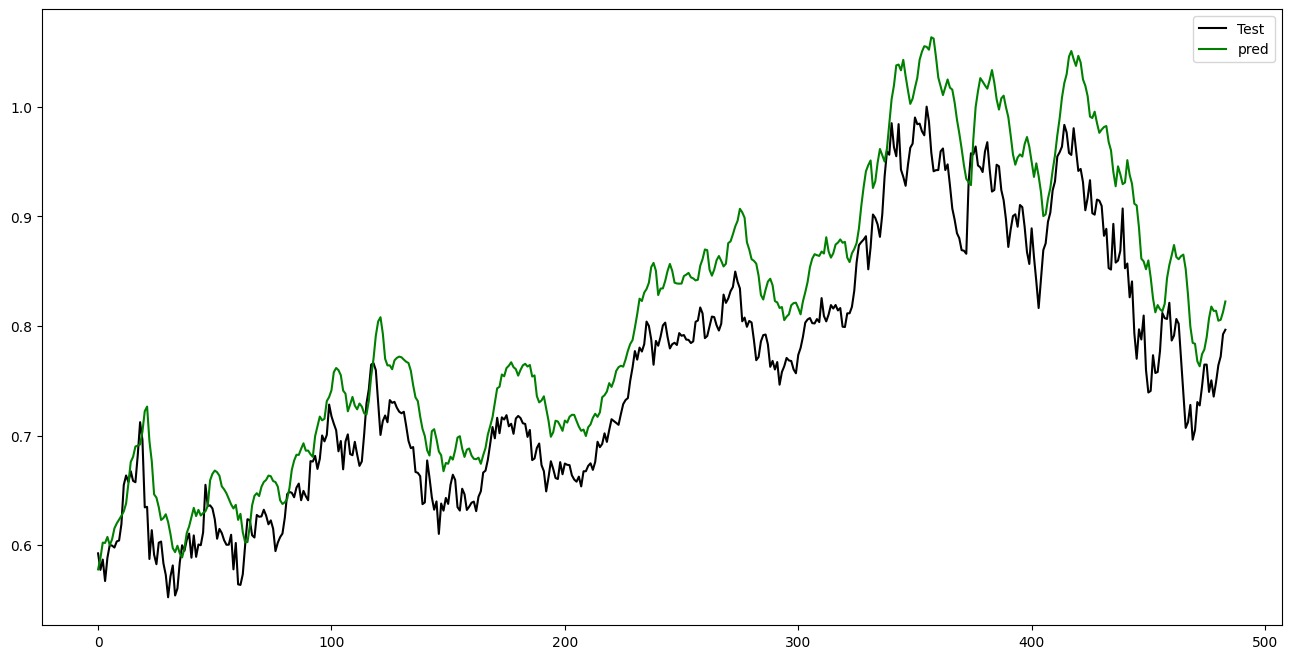

In [11]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\pramo\AppData\Local\Temp\ipykernel_6604\3528514363.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


2449
Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4.3205e-04 - val_loss: 8.7996e-06
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.4813e-05 - val_loss: 6.8254e-05
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.9880e-05 - val_loss: 8.7293e-06
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.2899e-05 - val_loss: 2.8291e-06
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.5724e-05 - val_loss: 8.2838e-06
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.6204e-05 - val_loss: 3.9553e-05
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.2354e-05 - val_loss: 1.0542e-05
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.2790e-05 - val_loss: 1.2724e-05
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.1427e-05 - val_loss: 3.6577e-06
Epoch 10/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.8208e-05 - val_loss: 6.0895e-06
Epoch 11/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 

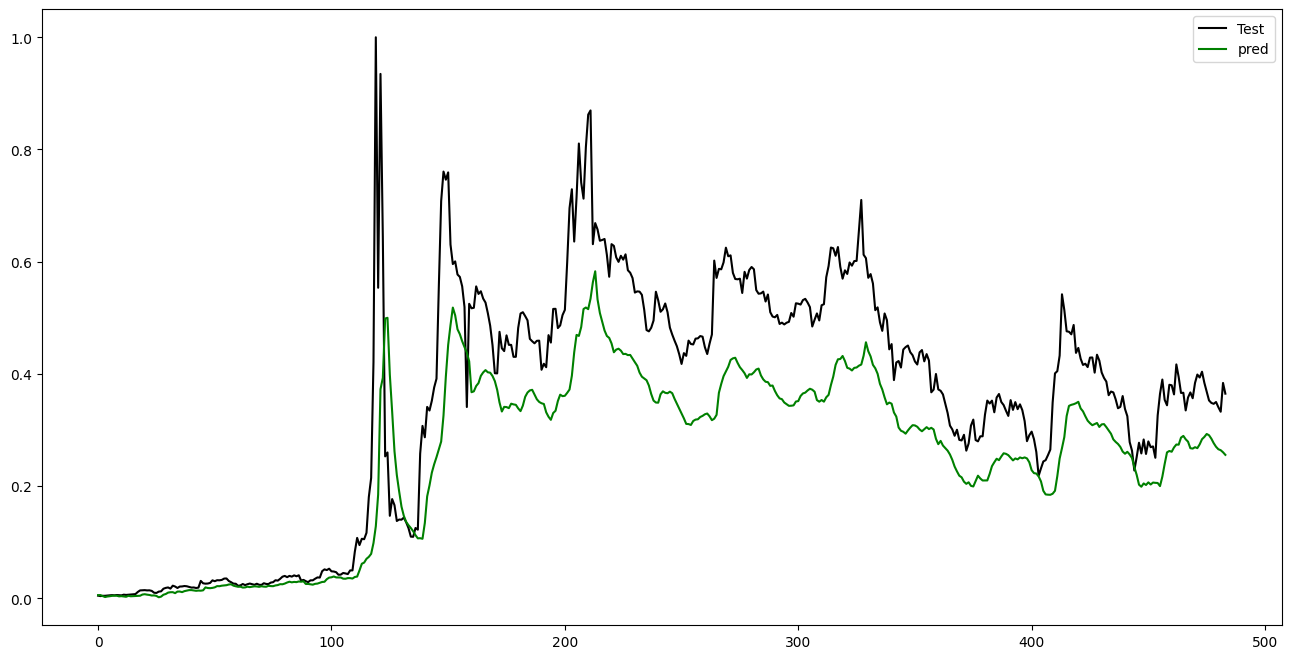

In [12]:
data = yf.download(tickers = 'GME', start = '2012-03-11',end = '2022-07-10')
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)

X = []

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])
        
X=np.moveaxis(X, [0], [2])


X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

splitlimit = int(len(X)*0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]


np.random.seed(10)
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)


y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])


plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\pramo\AppData\Local\Temp\ipykernel_6604\3603649247.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


2449
Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.2051e-04 - val_loss: 9.6708e-04
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.3387e-06 - val_loss: 7.7201e-04
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.5469e-06 - val_loss: 7.8915e-04
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.5555e-06 - val_loss: 5.9283e-04
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.9535e-06 - val_loss: 3.4932e-04
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 7.4276e-06 - val_loss: 4.5425e-04
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5593e-06 - val_loss: 4.4070e-04
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.5402e-06 - val_loss: 4.4094e-04
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.1893e-06 - val_loss: 3.2369e-04
Epoch 10/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 4.3922e-06 - val_loss: 4.0237e-04
Epoch 11/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 

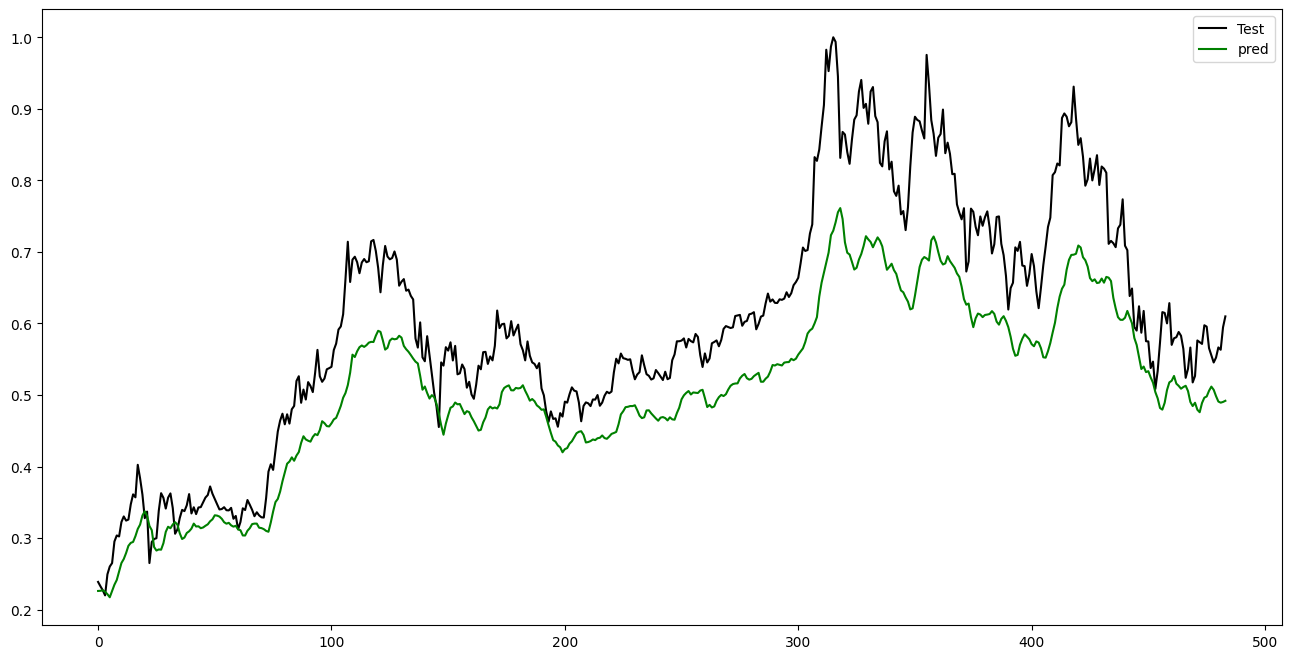

In [13]:
data = yf.download(tickers = 'TSLA', start = '2012-03-11',end = '2022-07-10')
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)

X = []

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])
        
X=np.moveaxis(X, [0], [2])


X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

splitlimit = int(len(X)*0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]


np.random.seed(10)
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)


y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])


plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()